# Technical Analysis with Python - an Introduction

## Objectives:

1. Learn and understand how to chart technical analysis tools:
   - MACD
   - RSI
   - Bollinger Bands
   - Moving Averages
   - Trendlines
   - Resistance / Support Levels

__Key Learnings__:
1. MACD
   - Subtracts 26day EMA from 12 day EMA, with signal line the 9 day EMA of the MACD line. When MACD crosses Signal line, 'BUY' due to the momentum. Otherwise, 'short' (downward momentum).

2. RSI
- Get the relative strength (average gain for 14 periods divided by average losses)
- 100 - 1 divided by (1+relative stength)
- RSI crosses 30 towards 70, buy signal.

3. Bollinger Bands
- Get the 20 day moving average of the price and the 20 day std of the price.
- Use the info above to get an upper bound and a lower bound
- If price is towards the upper bound, it indicates a breakout and uptrend(buy). Short if it's on the lower bound. 

4. Moving Averages
- Take the 50 day moving average (average of past 50 days) and the 200 day moving average
- When the 50 day moving average crosses the 200 day moving average upward, BUY
- When 200 day moving averge crosses the 50 day moving average downward, SHORT

5. Trendlines
- Trendlines are straight lines that connect two or more price points on a chart, indicating the direction of price movement
- An uptrend line connects higher lows, while a downtrend line connects lower highs
- Trendlines act as dynamic support and resistance levels
- Helps you to buy at the 'low' of the various cycles

6. Resistance
- Often formed by previous lows; the more times the price tests this level without breaking it, the stronger it is considered





## Getting started and simple Price Charts

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import cufflinks as cf
plt.style.use("seaborn-v0_8")

In [3]:
df = pd.read_csv("stocks.csv", header = [0, 1], index_col = 0, parse_dates = [0])
df

Attributes   Adj Close                              Close             \
Symbols           MSFT         GE        AAPL        MSFT         GE   
Date                                                                   
2010-01-04   24.049969  11.001803    6.583586   30.950001  14.855769   
2010-01-05   24.057743  11.058768    6.594968   30.959999  14.932692   
2010-01-06   23.910097  11.001803    6.490066   30.770000  14.855769   
2010-01-07   23.661432  11.571475    6.478067   30.450001  15.625000   
2010-01-08   23.824627  11.820707    6.521136   30.660000  15.961538   
...                ...        ...         ...         ...        ...   
2020-12-24  222.238144  10.650000  131.773087  222.750000  10.650000   
2020-12-28  224.443069  10.640000  136.486053  224.960007  10.640000   
2020-12-29  223.634918  10.560000  134.668762  224.149994  10.560000   
2020-12-30  221.170593  10.710000  133.520477  221.679993  10.710000   
2020-12-31  221.908905  10.800000  132.492020  222.419998  10.800000   

Attributes                    High                                Low  \
Symbols           AAPL        MSFT         GE        AAPL        MSFT   
Date                                                                    
2010-01-04    7.643214   31.100000  15.038462    7.660714   30.590000   
2010-01-05    7.656429   31.100000  15.067308    7.699643   30.639999   
2010-01-06    7.534643   31.080000  15.019231    7.686786   30.520000   
2010-01-07    7.520714   30.700001  15.846154    7.571429   30.190001   
2010-01-08    7.570714   30.879999  16.048077    7.571429   30.240000   
...                ...         ...        ...         ...         ...   
2020-12-24  131.970001  223.610001  10.850000  133.460007  221.199997   
2020-12-28  136.690002  226.029999  10.780000  137.339996  223.020004   
2020-12-29  134.869995  227.179993  10.770000  138.789993  223.580002   
2020-12-30  133.720001  225.630005  10.850000  135.990005  221.470001   
2020-12-31  132.690002  223.000000  10.830000  134.740005  219.679993   

Attributes                               Open                         \
Symbols            GE        AAPL        MSFT         GE        AAPL   
Date                                                                   
2010-01-04  14.567308    7.585000   30.620001  14.634615    7.622500   
2010-01-05  14.855769    7.616071   30.850000  14.865385    7.664286   
2010-01-06  14.846154    7.526786   30.879999  14.932692    7.656429   
2010-01-07  14.836538    7.466071   30.629999  14.884615    7.562500   
2010-01-08  15.644231    7.466429   30.280001  15.682692    7.510714   
...               ...         ...         ...        ...         ...   
2020-12-24  10.620000  131.100006  221.419998  10.850000  131.320007   
2020-12-28  10.580000  133.509995  224.449997  10.700000  133.990005   
2020-12-29  10.540000  134.339996  226.309998  10.660000  138.050003   
2020-12-30  10.550000  133.399994  225.229996  10.580000  135.580002   
2020-12-31  10.580000  131.720001  221.699997  10.650000  134.080002   

Attributes      Volume                            
Symbols           MSFT           GE         AAPL  
Date                                              
2010-01-04  38409100.0   69763096.0  493729600.0  
2010-01-05  49749600.0   67132624.0  601904800.0  
2010-01-06  58182400.0   57683496.0  552160000.0  
2010-01-07  50559700.0  192891192.0  477131200.0  
2010-01-08  51197400.0  119717104.0  447610800.0  
...                ...          ...          ...  
2020-12-24  10550600.0   30049700.0   54930100.0  
2020-12-28  17933500.0   53796700.0  124486200.0  
2020-12-29  17403200.0   53035900.0  121047300.0  
2020-12-30  20272300.0   50621000.0   96452100.0  
2020-12-31  20942100.0   47702300.0   99116600.0  

[2769 rows x 18 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2010-01-04 to 2020-12-31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  2769 non-null   float64
 1   (Adj Close, GE)    2769 non-null   float64
 2   (Adj Close, AAPL)  2769 non-null   float64
 3   (Close, MSFT)      2769 non-null   float64
 4   (Close, GE)        2769 non-null   float64
 5   (Close, AAPL)      2769 non-null   float64
 6   (High, MSFT)       2769 non-null   float64
 7   (High, GE)         2769 non-null   float64
 8   (High, AAPL)       2769 non-null   float64
 9   (Low, MSFT)        2769 non-null   float64
 10  (Low, GE)          2769 non-null   float64
 11  (Low, AAPL)        2769 non-null   float64
 12  (Open, MSFT)       2769 non-null   float64
 13  (Open, GE)         2769 non-null   float64
 14  (Open, AAPL)       2769 non-null   float64
 15  (Volume, MSFT)     2769 non-null   float64
 16  (Volum

In [8]:
df.Close.GE

Date
2010-01-04    14.855769
2010-01-05    14.932692
2010-01-06    14.855769
2010-01-07    15.625000
2010-01-08    15.961538
                ...    
2020-12-24    10.650000
2020-12-28    10.640000
2020-12-29    10.560000
2020-12-30    10.710000
2020-12-31    10.800000
Name: GE, Length: 2769, dtype: float64

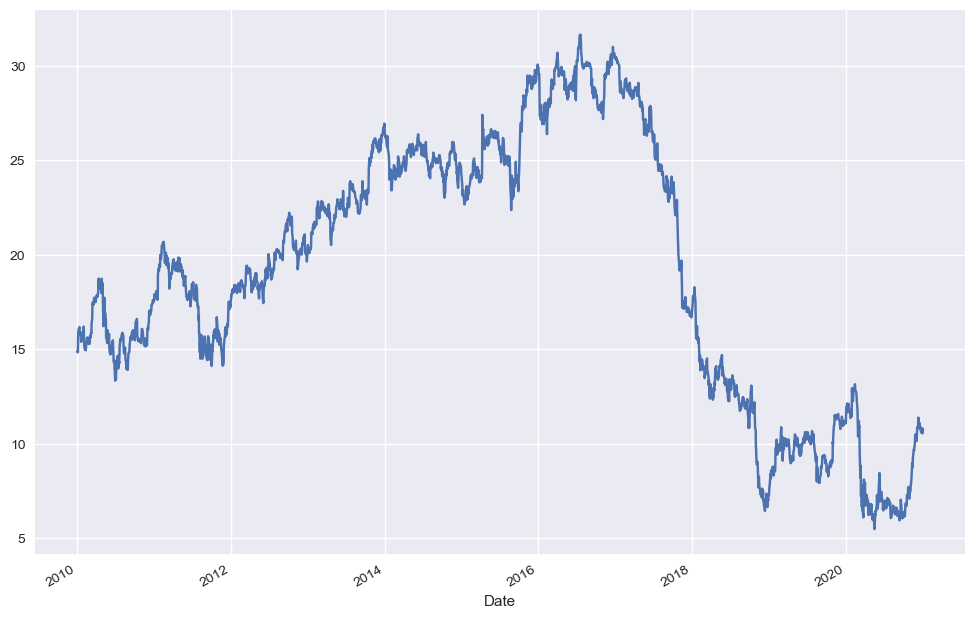

In [10]:
df.Close.GE.plot(figsize = (12, 8))
plt.show()

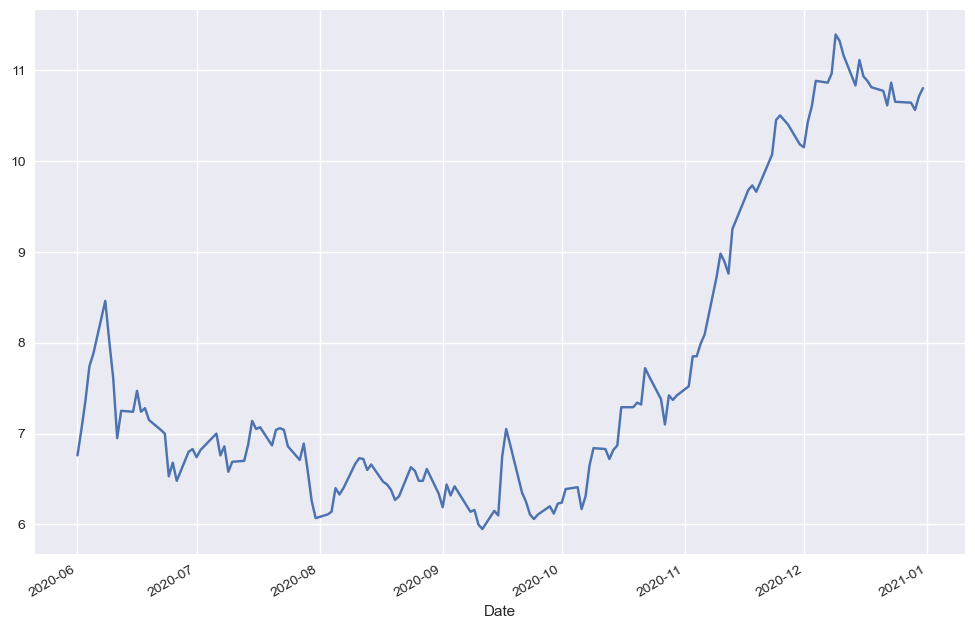

In [12]:
df.loc["2020-06":, ("Close", "GE")].plot(figsize = (12, 8))
plt.show()


## Charting - Interactive Line Charts with Cufflinks and Plotly

In [14]:
df

Attributes   Adj Close                              Close             \
Symbols           MSFT         GE        AAPL        MSFT         GE   
Date                                                                   
2010-01-04   24.049969  11.001803    6.583586   30.950001  14.855769   
2010-01-05   24.057743  11.058768    6.594968   30.959999  14.932692   
2010-01-06   23.910097  11.001803    6.490066   30.770000  14.855769   
2010-01-07   23.661432  11.571475    6.478067   30.450001  15.625000   
2010-01-08   23.824627  11.820707    6.521136   30.660000  15.961538   
...                ...        ...         ...         ...        ...   
2020-12-24  222.238144  10.650000  131.773087  222.750000  10.650000   
2020-12-28  224.443069  10.640000  136.486053  224.960007  10.640000   
2020-12-29  223.634918  10.560000  134.668762  224.149994  10.560000   
2020-12-30  221.170593  10.710000  133.520477  221.679993  10.710000   
2020-12-31  221.908905  10.800000  132.492020  222.419998  10.800000   

Attributes                    High                                Low  \
Symbols           AAPL        MSFT         GE        AAPL        MSFT   
Date                                                                    
2010-01-04    7.643214   31.100000  15.038462    7.660714   30.590000   
2010-01-05    7.656429   31.100000  15.067308    7.699643   30.639999   
2010-01-06    7.534643   31.080000  15.019231    7.686786   30.520000   
2010-01-07    7.520714   30.700001  15.846154    7.571429   30.190001   
2010-01-08    7.570714   30.879999  16.048077    7.571429   30.240000   
...                ...         ...        ...         ...         ...   
2020-12-24  131.970001  223.610001  10.850000  133.460007  221.199997   
2020-12-28  136.690002  226.029999  10.780000  137.339996  223.020004   
2020-12-29  134.869995  227.179993  10.770000  138.789993  223.580002   
2020-12-30  133.720001  225.630005  10.850000  135.990005  221.470001   
2020-12-31  132.690002  223.000000  10.830000  134.740005  219.679993   

Attributes                               Open                         \
Symbols            GE        AAPL        MSFT         GE        AAPL   
Date                                                                   
2010-01-04  14.567308    7.585000   30.620001  14.634615    7.622500   
2010-01-05  14.855769    7.616071   30.850000  14.865385    7.664286   
2010-01-06  14.846154    7.526786   30.879999  14.932692    7.656429   
2010-01-07  14.836538    7.466071   30.629999  14.884615    7.562500   
2010-01-08  15.644231    7.466429   30.280001  15.682692    7.510714   
...               ...         ...         ...        ...         ...   
2020-12-24  10.620000  131.100006  221.419998  10.850000  131.320007   
2020-12-28  10.580000  133.509995  224.449997  10.700000  133.990005   
2020-12-29  10.540000  134.339996  226.309998  10.660000  138.050003   
2020-12-30  10.550000  133.399994  225.229996  10.580000  135.580002   
2020-12-31  10.580000  131.720001  221.699997  10.650000  134.080002   

Attributes      Volume                            
Symbols           MSFT           GE         AAPL  
Date                                              
2010-01-04  38409100.0   69763096.0  493729600.0  
2010-01-05  49749600.0   67132624.0  601904800.0  
2010-01-06  58182400.0   57683496.0  552160000.0  
2010-01-07  50559700.0  192891192.0  477131200.0  
2010-01-08  51197400.0  119717104.0  447610800.0  
...                ...          ...          ...  
2020-12-24  10550600.0   30049700.0   54930100.0  
2020-12-28  17933500.0   53796700.0  124486200.0  
2020-12-29  17403200.0   53035900.0  121047300.0  
2020-12-30  20272300.0   50621000.0   96452100.0  
2020-12-31  20942100.0   47702300.0   99116600.0  

[2769 rows x 18 columns]

In [16]:
cf.set_config_file(offline = True)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



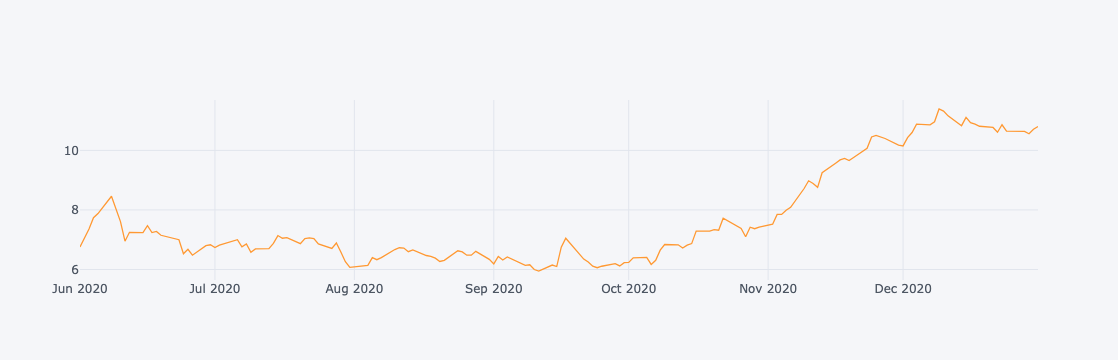

In [18]:
df.loc["2020-06":, ("Close", "GE")].iplot()

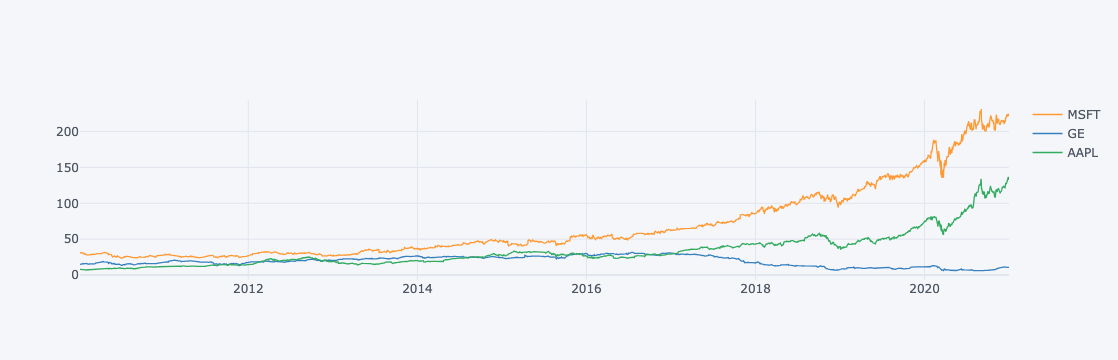

In [20]:
df.Close.iplot()

## Customizing Plotly Charts

In [22]:
df.Close

Symbols           MSFT         GE        AAPL
Date                                         
2010-01-04   30.950001  14.855769    7.643214
2010-01-05   30.959999  14.932692    7.656429
2010-01-06   30.770000  14.855769    7.534643
2010-01-07   30.450001  15.625000    7.520714
2010-01-08   30.660000  15.961538    7.570714
...                ...        ...         ...
2020-12-24  222.750000  10.650000  131.970001
2020-12-28  224.960007  10.640000  136.690002
2020-12-29  224.149994  10.560000  134.869995
2020-12-30  221.679993  10.710000  133.720001
2020-12-31  222.419998  10.800000  132.690002

[2769 rows x 3 columns]

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



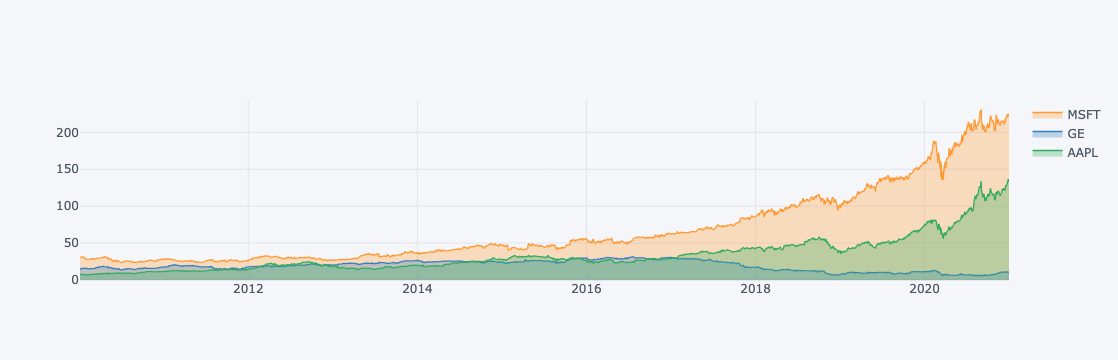

In [24]:
df.Close.iplot(fill = True)

In [26]:
cf.colors.scales()

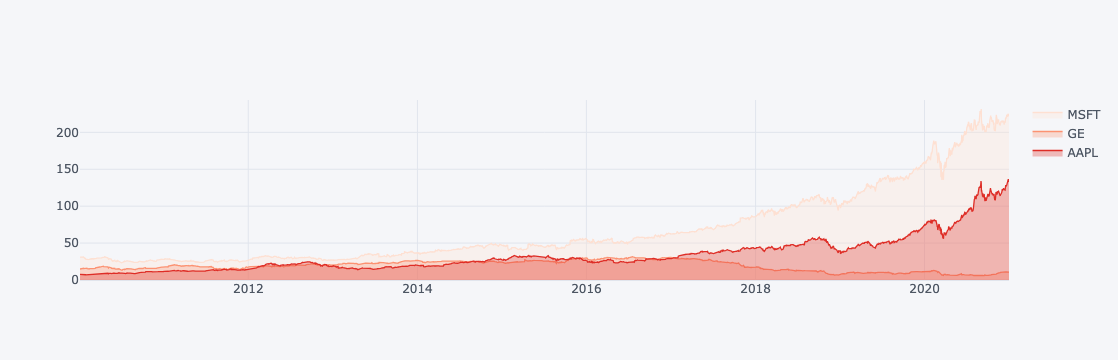

In [28]:
df.Close.iplot(fill = True, colorscale= "reds")

In [30]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

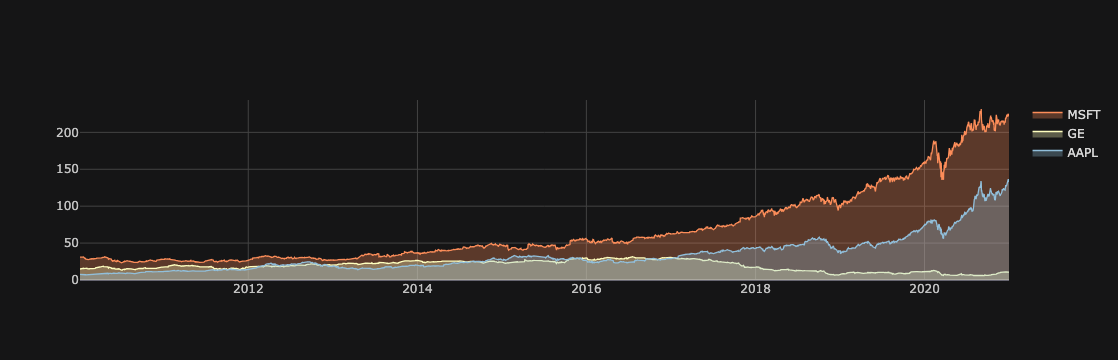

In [32]:
df.Close.iplot(fill = True, colorscale= "rdylbu", theme= "solar")




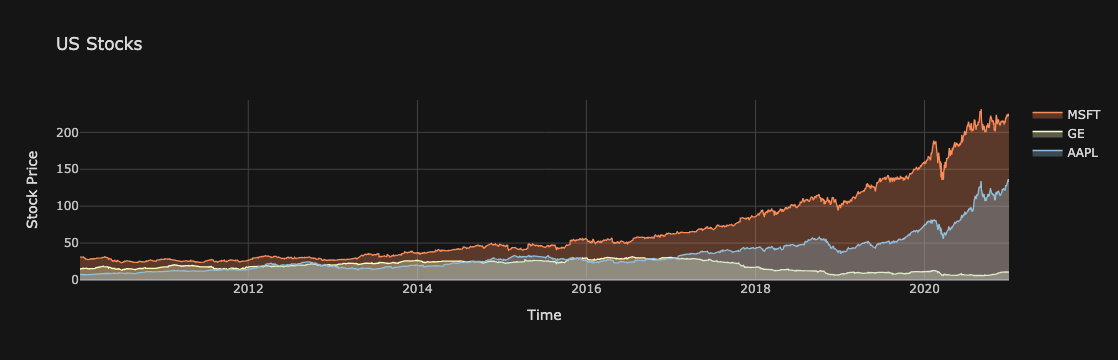

In [34]:
df.Close.iplot(fill = True, colorscale= "rdylbu", theme= "solar", 
             title= "US Stocks", xTitle= "Time", yTitle= "Stock Price")

In [38]:
df.Close[["GE", "AAPL"]].iplot(kind = "spread", fill = True, colorscale= "rdylbu", theme= "solar",
                             title= "GE vs. AAPL", xTitle= "Time", yTitle= "Stock Price")

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:848: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



AttributeError: module 'pandas' has no attribute 'np'

## Candlestick and OHLC Charts 

In [40]:
df

Attributes   Adj Close                              Close             \
Symbols           MSFT         GE        AAPL        MSFT         GE   
Date                                                                   
2010-01-04   24.049969  11.001803    6.583586   30.950001  14.855769   
2010-01-05   24.057743  11.058768    6.594968   30.959999  14.932692   
2010-01-06   23.910097  11.001803    6.490066   30.770000  14.855769   
2010-01-07   23.661432  11.571475    6.478067   30.450001  15.625000   
2010-01-08   23.824627  11.820707    6.521136   30.660000  15.961538   
...                ...        ...         ...         ...        ...   
2020-12-24  222.238144  10.650000  131.773087  222.750000  10.650000   
2020-12-28  224.443069  10.640000  136.486053  224.960007  10.640000   
2020-12-29  223.634918  10.560000  134.668762  224.149994  10.560000   
2020-12-30  221.170593  10.710000  133.520477  221.679993  10.710000   
2020-12-31  221.908905  10.800000  132.492020  222.419998  10.800000   

Attributes                    High                                Low  \
Symbols           AAPL        MSFT         GE        AAPL        MSFT   
Date                                                                    
2010-01-04    7.643214   31.100000  15.038462    7.660714   30.590000   
2010-01-05    7.656429   31.100000  15.067308    7.699643   30.639999   
2010-01-06    7.534643   31.080000  15.019231    7.686786   30.520000   
2010-01-07    7.520714   30.700001  15.846154    7.571429   30.190001   
2010-01-08    7.570714   30.879999  16.048077    7.571429   30.240000   
...                ...         ...        ...         ...         ...   
2020-12-24  131.970001  223.610001  10.850000  133.460007  221.199997   
2020-12-28  136.690002  226.029999  10.780000  137.339996  223.020004   
2020-12-29  134.869995  227.179993  10.770000  138.789993  223.580002   
2020-12-30  133.720001  225.630005  10.850000  135.990005  221.470001   
2020-12-31  132.690002  223.000000  10.830000  134.740005  219.679993   

Attributes                               Open                         \
Symbols            GE        AAPL        MSFT         GE        AAPL   
Date                                                                   
2010-01-04  14.567308    7.585000   30.620001  14.634615    7.622500   
2010-01-05  14.855769    7.616071   30.850000  14.865385    7.664286   
2010-01-06  14.846154    7.526786   30.879999  14.932692    7.656429   
2010-01-07  14.836538    7.466071   30.629999  14.884615    7.562500   
2010-01-08  15.644231    7.466429   30.280001  15.682692    7.510714   
...               ...         ...         ...        ...         ...   
2020-12-24  10.620000  131.100006  221.419998  10.850000  131.320007   
2020-12-28  10.580000  133.509995  224.449997  10.700000  133.990005   
2020-12-29  10.540000  134.339996  226.309998  10.660000  138.050003   
2020-12-30  10.550000  133.399994  225.229996  10.580000  135.580002   
2020-12-31  10.580000  131.720001  221.699997  10.650000  134.080002   

Attributes      Volume                            
Symbols           MSFT           GE         AAPL  
Date                                              
2010-01-04  38409100.0   69763096.0  493729600.0  
2010-01-05  49749600.0   67132624.0  601904800.0  
2010-01-06  58182400.0   57683496.0  552160000.0  
2010-01-07  50559700.0  192891192.0  477131200.0  
2010-01-08  51197400.0  119717104.0  447610800.0  
...                ...          ...          ...  
2020-12-24  10550600.0   30049700.0   54930100.0  
2020-12-28  17933500.0   53796700.0  124486200.0  
2020-12-29  17403200.0   53035900.0  121047300.0  
2020-12-30  20272300.0   50621000.0   96452100.0  
2020-12-31  20942100.0   47702300.0   99116600.0  

[2769 rows x 18 columns]

In [44]:
df.swaplevel(axis = 1)

Symbols           MSFT         GE        AAPL        MSFT         GE  \
Attributes   Adj Close  Adj Close   Adj Close       Close      Close   
Date                                                                   
2010-01-04   24.049969  11.001803    6.583586   30.950001  14.855769   
2010-01-05   24.057743  11.058768    6.594968   30.959999  14.932692   
2010-01-06   23.910097  11.001803    6.490066   30.770000  14.855769   
2010-01-07   23.661432  11.571475    6.478067   30.450001  15.625000   
2010-01-08   23.824627  11.820707    6.521136   30.660000  15.961538   
...                ...        ...         ...         ...        ...   
2020-12-24  222.238144  10.650000  131.773087  222.750000  10.650000   
2020-12-28  224.443069  10.640000  136.486053  224.960007  10.640000   
2020-12-29  223.634918  10.560000  134.668762  224.149994  10.560000   
2020-12-30  221.170593  10.710000  133.520477  221.679993  10.710000   
2020-12-31  221.908905  10.800000  132.492020  222.419998  10.800000   

Symbols           AAPL        MSFT         GE        AAPL        MSFT  \
Attributes       Close        High       High        High         Low   
Date                                                                    
2010-01-04    7.643214   31.100000  15.038462    7.660714   30.590000   
2010-01-05    7.656429   31.100000  15.067308    7.699643   30.639999   
2010-01-06    7.534643   31.080000  15.019231    7.686786   30.520000   
2010-01-07    7.520714   30.700001  15.846154    7.571429   30.190001   
2010-01-08    7.570714   30.879999  16.048077    7.571429   30.240000   
...                ...         ...        ...         ...         ...   
2020-12-24  131.970001  223.610001  10.850000  133.460007  221.199997   
2020-12-28  136.690002  226.029999  10.780000  137.339996  223.020004   
2020-12-29  134.869995  227.179993  10.770000  138.789993  223.580002   
2020-12-30  133.720001  225.630005  10.850000  135.990005  221.470001   
2020-12-31  132.690002  223.000000  10.830000  134.740005  219.679993   

Symbols            GE        AAPL        MSFT         GE        AAPL  \
Attributes        Low         Low        Open       Open        Open   
Date                                                                   
2010-01-04  14.567308    7.585000   30.620001  14.634615    7.622500   
2010-01-05  14.855769    7.616071   30.850000  14.865385    7.664286   
2010-01-06  14.846154    7.526786   30.879999  14.932692    7.656429   
2010-01-07  14.836538    7.466071   30.629999  14.884615    7.562500   
2010-01-08  15.644231    7.466429   30.280001  15.682692    7.510714   
...               ...         ...         ...        ...         ...   
2020-12-24  10.620000  131.100006  221.419998  10.850000  131.320007   
2020-12-28  10.580000  133.509995  224.449997  10.700000  133.990005   
2020-12-29  10.540000  134.339996  226.309998  10.660000  138.050003   
2020-12-30  10.550000  133.399994  225.229996  10.580000  135.580002   
2020-12-31  10.580000  131.720001  221.699997  10.650000  134.080002   

Symbols           MSFT           GE         AAPL  
Attributes      Volume       Volume       Volume  
Date                                              
2010-01-04  38409100.0   69763096.0  493729600.0  
2010-01-05  49749600.0   67132624.0  601904800.0  
2010-01-06  58182400.0   57683496.0  552160000.0  
2010-01-07  50559700.0  192891192.0  477131200.0  
2010-01-08  51197400.0  119717104.0  447610800.0  
...                ...          ...          ...  
2020-12-24  10550600.0   30049700.0   54930100.0  
2020-12-28  17933500.0   53796700.0  124486200.0  
2020-12-29  17403200.0   53035900.0  121047300.0  
2020-12-30  20272300.0   50621000.0   96452100.0  
2020-12-31  20942100.0   47702300.0   99116600.0  

[2769 rows x 18 columns]

In [46]:
ge = df.swaplevel(axis = 1).GE.copy()

In [48]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

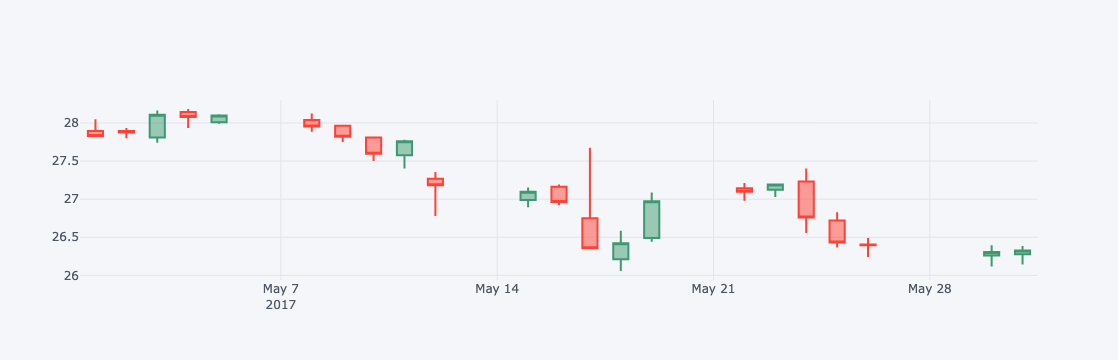

In [50]:
ge.loc["05-2017"].iplot(kind= "candle")



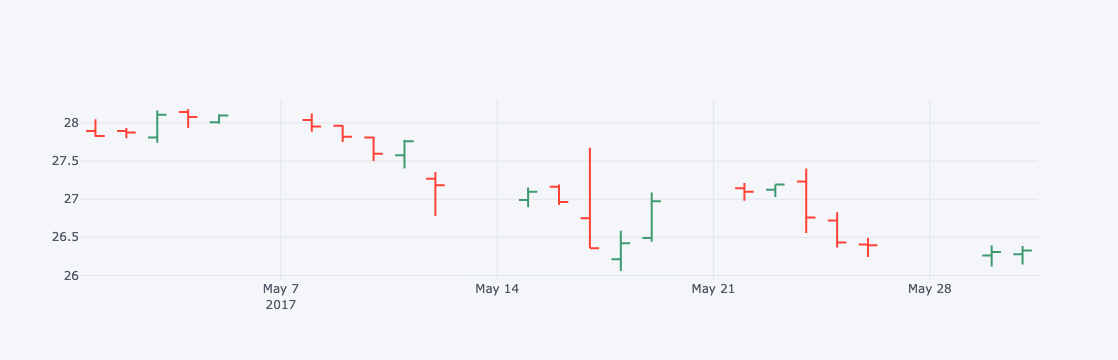

In [52]:
ge.loc["5-2017"].iplot(kind= "ohlc")

## Bar Size / Granularity

In [78]:
from pandas.tseries.frequencies import to_offset
ge
ge.loc["5-2017"].iplot(kind= "candle")
weekly = ge.resample("W-Fri").ohlc()
weekly = ge.resample("W-Fri").agg({"Open":"first",
                                   "High":"max",
                                   "Low":"min",
                                   "Close":"last"
                                  })

weekly.index = weekly.index - to_offset("4d")
weekly.loc["5-2017":"9-2017"].iplot(kind= "candle")



SyntaxError: unterminated string literal (detected at line 26) (544551617.py, line 26)

In [56]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

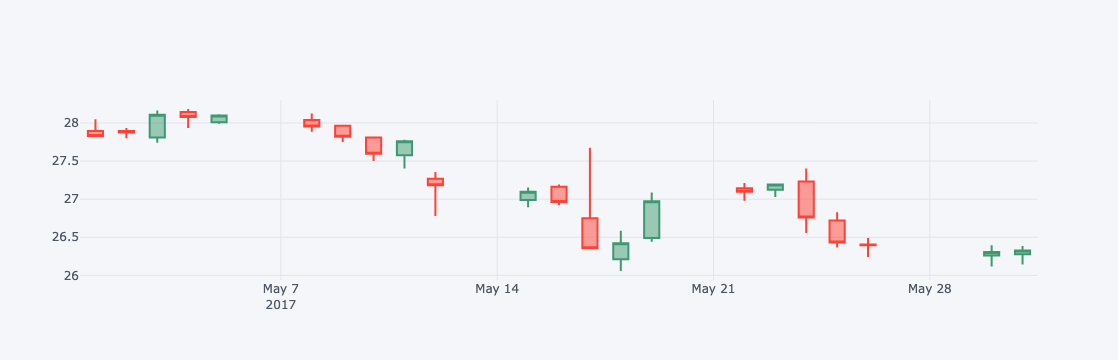

In [58]:
ge.loc["5-2017"].iplot(kind= "candle")

In [64]:
weekly = ge.resample("W-Fri").ohlc()

In [62]:
weekly

Attributes  Adj Close                                       Close             \
                 open       high        low      close       open       high   
Date                                                                           
2010-01-08  11.001803  11.820707  11.001803  11.820707  14.855769  15.961538   
2010-01-15  11.934643  11.984488  11.706768  11.706768  16.115385  16.182692   
2010-01-22  11.777981  11.777981  11.407688  11.471783  15.903846  15.903846   
2010-01-29  11.656926  11.656926  11.450418  11.450418  15.740385  15.740385   
2010-02-05  11.571475  11.998730  11.243912  11.243912  15.625000  16.201923   
...               ...        ...        ...        ...        ...        ...   
2020-12-04  10.170644  10.870000  10.140671  10.870000  10.180000  10.880000   
2020-12-11  10.850019  11.379532  10.850019  11.149743  10.860000  11.390000   
2020-12-18  10.820046  11.099789  10.810000  10.810000  10.830000  11.110000   
2020-12-25  10.770000  10.860000  10.610000  10.650000  10.770000  10.860000   
2021-01-01  10.640000  10.800000  10.560000  10.800000  10.640000  10.800000   

Attributes                             High             ...        Low  \
                  low      close       open       high  ...        low   
Date                                                    ...              
2010-01-08  14.855769  15.961538  15.038462  16.048077  ...  14.567308   
2010-01-15  15.807692  15.807692  16.230768  16.269232  ...  15.721154   
2010-01-22  15.403846  15.490385  16.105768  16.115385  ...  15.336538   
2010-01-29  15.461538  15.461538  15.894231  16.057692  ...  15.394231   
2010-02-05  15.182692  15.182692  15.711538  16.375000  ...  14.663462   
...               ...        ...        ...        ...  ...        ...   
2020-12-04  10.150000  10.880000  10.390000  10.930000  ...   9.960000   
2020-12-11  10.860000  11.160000  11.100000  11.490000  ...  10.760000   
2020-12-18  10.810000  10.810000  11.350000  11.350000  ...  10.650000   
2020-12-25  10.610000  10.650000  10.870000  10.980000  ...  10.360000   
2021-01-01  10.560000  10.800000  10.780000  10.850000  ...  10.540000   

Attributes                  Open                                   \
                close       open       high        low      close   
Date                                                                
2010-01-08  15.644231  14.634615  15.682692  14.634615  15.682692   
2010-01-15  15.721154  16.182692  16.182692  15.942308  16.038462   
2010-01-22  15.471154  15.721154  15.913462  15.721154  15.913462   
2010-01-29  15.451923  15.826923  15.826923  15.596154  15.596154   
2010-02-05  14.663462  15.576923  16.144232  15.423077  15.423077   
...               ...        ...        ...        ...        ...   
2020-12-04  10.510000  10.390000  10.670000  10.080000  10.670000   
2020-12-11  11.020000  10.890000  11.280000  10.820000  11.280000   
2020-12-18  10.740000  11.270000  11.270000  10.780000  10.780000   
2020-12-25  10.620000  10.470000  10.850000  10.470000  10.850000   
2021-01-01  10.580000  10.700000  10.700000  10.580000  10.650000   

Attributes       Volume                                        
                   open         high         low        close  
Date                                                           
2010-01-08   69763096.0  192891192.0  57683496.0  119717104.0  
2010-01-15   79742416.0   79742416.0  59655960.0   77072424.0  
2010-01-22   63125296.0  169184808.0  63125296.0  169184808.0  
2010-01-29   78166816.0   84404944.0  78166816.0   84404944.0  
2010-02-05   59218120.0  149243328.0  59218120.0  149243328.0  
...                 ...          ...         ...          ...  
2020-12-04  125104100.0  135020900.0  77235600.0  135020900.0  
2020-12-11   97404000.0  126135500.0  88985700.0   88985700.0  
2020-12-18   79317500.0  114753600.0  58815800.0  114753600.0  
2020-12-25   85818700.0   89007500.0  30049700.0   30049700.0  
2021-01-01   53796700.0   53796700.0  47702

In [66]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [68]:
weekly = ge.resample("W-Fri").agg({"Open":"first",
                                   "High":"max",
                                   "Low":"min",
                                   "Close":"last"
                                  })

In [70]:
weekly

Attributes       Open       High        Low      Close
Date                                                  
2010-01-08  14.634615  16.048077  14.567308  15.961538
2010-01-15  16.182692  16.269232  15.721154  15.807692
2010-01-22  15.721154  16.115385  15.336538  15.490385
2010-01-29  15.826923  16.057692  15.394231  15.461538
2010-02-05  15.576923  16.375000  14.663462  15.182692
...               ...        ...        ...        ...
2020-12-04  10.390000  10.930000   9.960000  10.880000
2020-12-11  10.890000  11.490000  10.760000  11.160000
2020-12-18  11.270000  11.350000  10.650000  10.810000
2020-12-25  10.470000  10.980000  10.360000  10.650000
2021-01-01  10.700000  10.850000  10.540000  10.800000

[574 rows x 4 columns]

In [72]:
weekly.index = weekly.index - to_offset("4d")


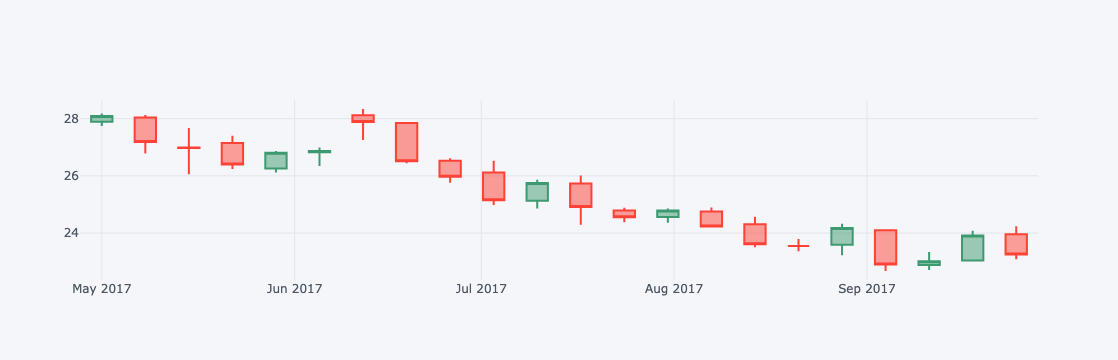

In [74]:
weekly.loc["5-2017":"9-2017"].iplot(kind= "candle")

## Volume Charts

In [80]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [84]:
qf = cf.QuantFig(df = ge.loc["5-2017"])

In [86]:
type(qf)

cufflinks.quant_figure.QuantFig

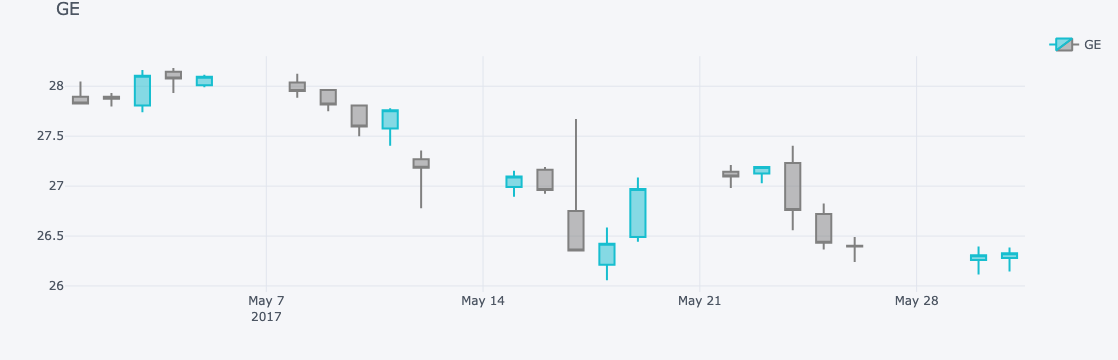

In [88]:
qf.iplot(title = "GE", name = "GE")

In [90]:
qf.add_volume(colorchange=False)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/quant_figure.py:1061: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



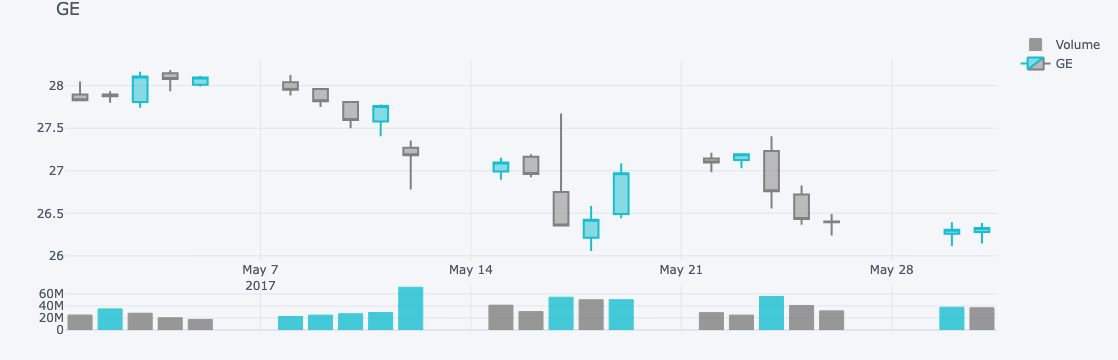

In [94]:
qf.iplot(title = "GE", name = "GE")

## Technical Indicators - an Overview

In [96]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [117]:
qf = cf.QuantFig(df = ge.loc["2017":"2018"])

In [119]:
qf.add_sma(periods = 20)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



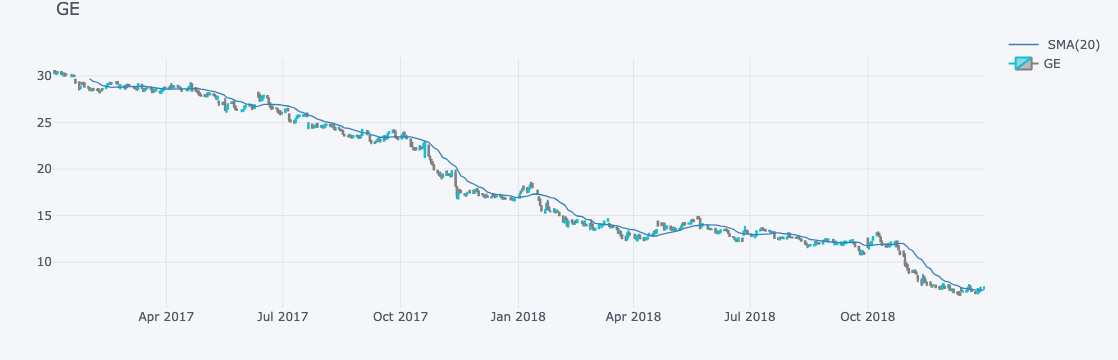

In [121]:
qf.iplot(title = "GE", name = "GE")

In [123]:
qf.add_sma(periods = 100)

In [125]:
qf.add_bollinger_bands(periods = 20, boll_std= 2)

In [131]:
qf = cf.QuantFig(df = ge.loc["5-2017":"9-2017"])

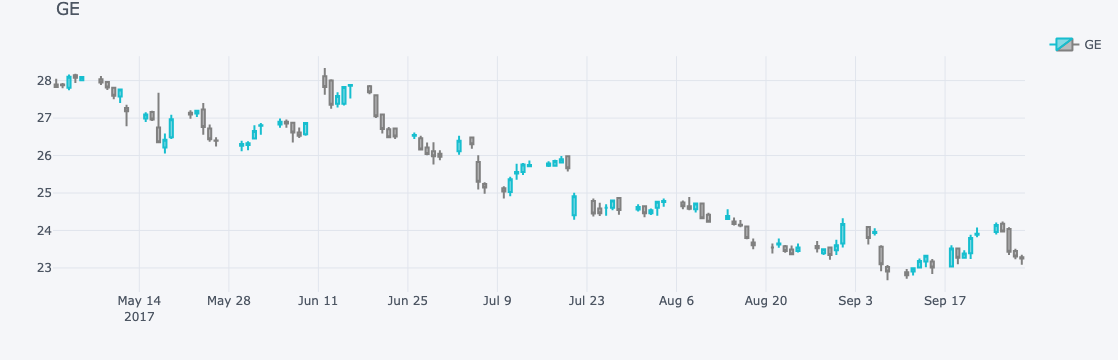

In [133]:
qf.iplot(title = "GE", name = "GE")

In [135]:
qf.add_macd()
qf.add_dmi()

## Trend Lines

In [137]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

__Uptrend__ (Higher Lows)

In [139]:
qf = cf.QuantFig(df = ge.loc["2012"])

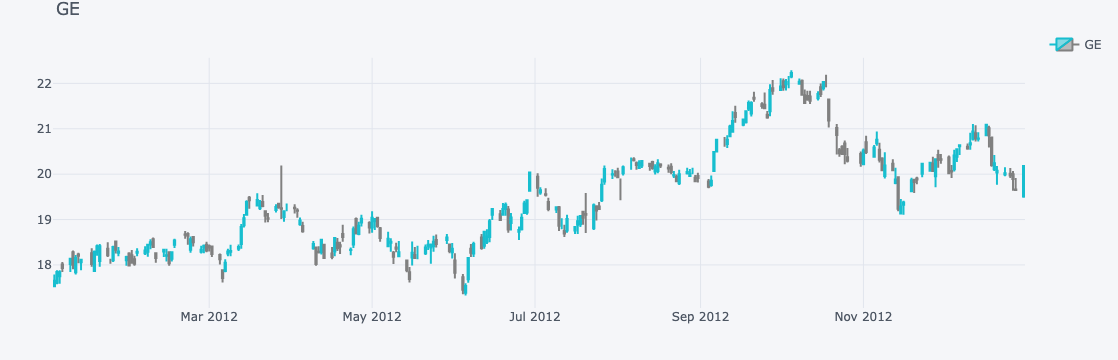

In [141]:
qf.iplot(title = "GE", name = "GE")

In [143]:
qf.add_trendline(date0 = "2012-07-12", date1 = "2012-09-04")

__Downtrend__ (Lower Highs)

In [145]:
qf = cf.QuantFig(df = ge.loc["2018"])

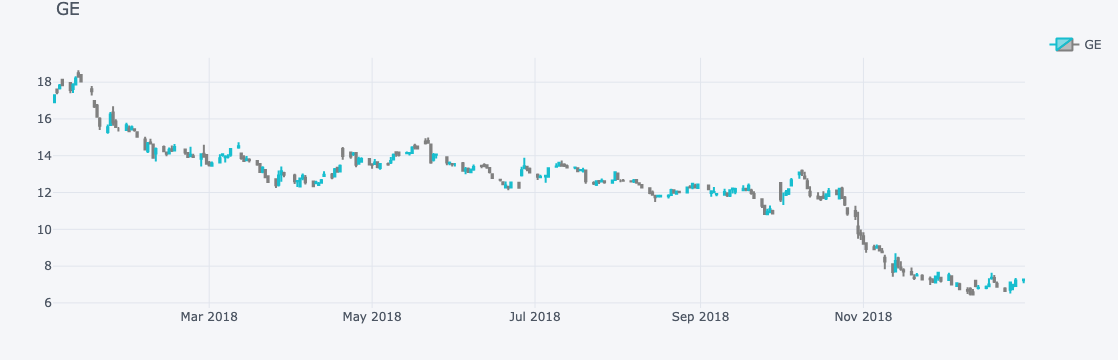

In [147]:
qf.iplot(title = "GE", name = "GE")

In [149]:
qf.add_trendline(date0 = "2018-05-22", date1 = "2018-10-09")

## Support and Resistance Levels

In [151]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

__Resistance Lines__

In [154]:
qf = cf.QuantFig(df = ge.loc["2012"])

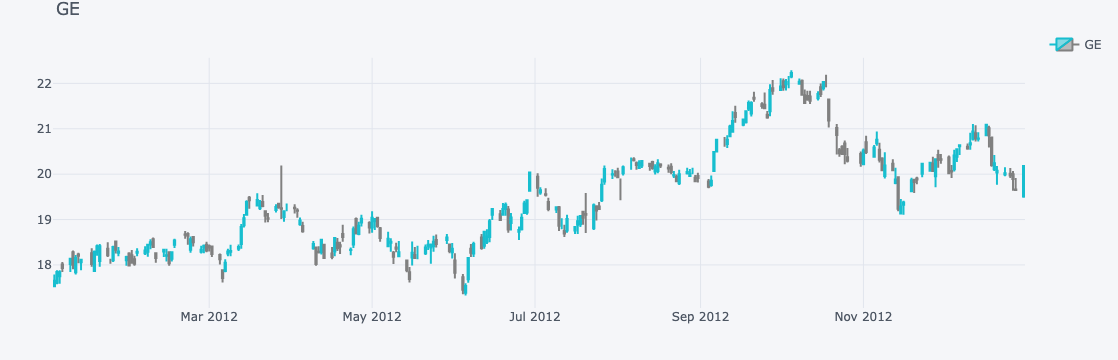

In [156]:
qf.iplot(title = "GE", name = "GE")

In [175]:
qf.add_resistance(date = "2012-03-28")

__Support Lines__

In [178]:
qf = cf.QuantFig(df = ge.loc["2013"])

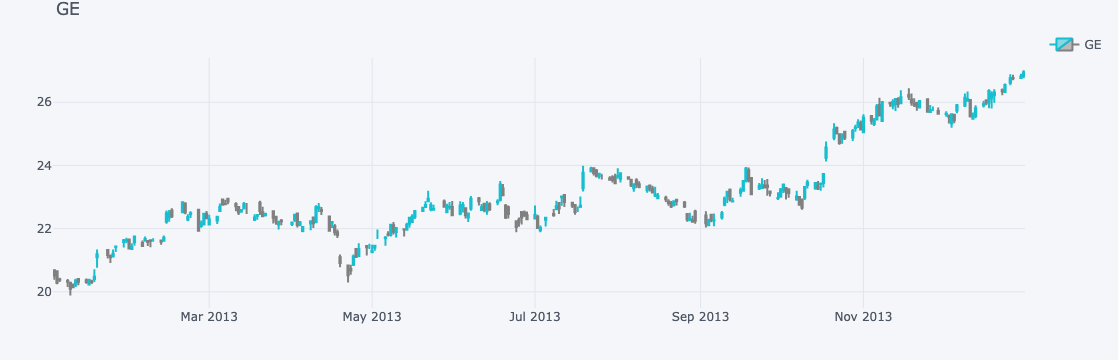

In [180]:
qf.iplot(title = "GE", name = "GE")

In [182]:
qf.add_support(date = "2013-06-24")

## Technical Indicators

__SMA__

In [167]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [169]:
qf = cf.QuantFig(df = ge.loc["2018":"2020"])

In [171]:
qf.add_sma(periods = 20)
qf.add_sma(periods = 100)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



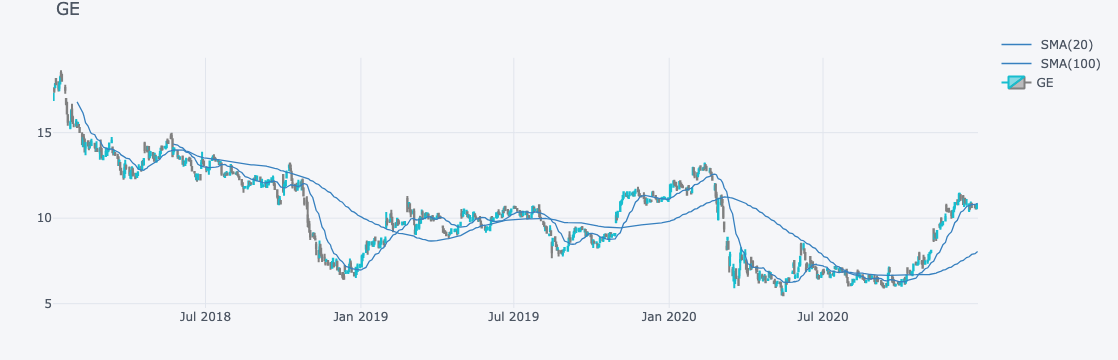

In [173]:
qf.iplot(title = "GE", name = "GE")

__EMA__

In [184]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [186]:
qf = cf.QuantFig(df = ge.loc["2018":"2020"])

In [188]:
qf.add_ema(periods = 20)
qf.add_ema(periods = 100)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



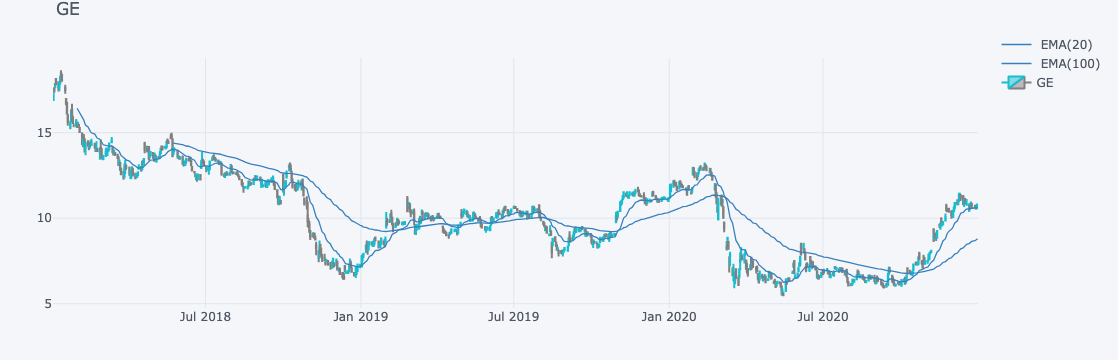

In [190]:
qf.iplot(title = "GE", name = "GE")

__SMA / EMA__

In [192]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [194]:
qf = cf.QuantFig(df = ge.loc["2018":"2019"])

In [196]:
qf.add_sma(periods = 50)
qf.add_ema(periods = 50)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



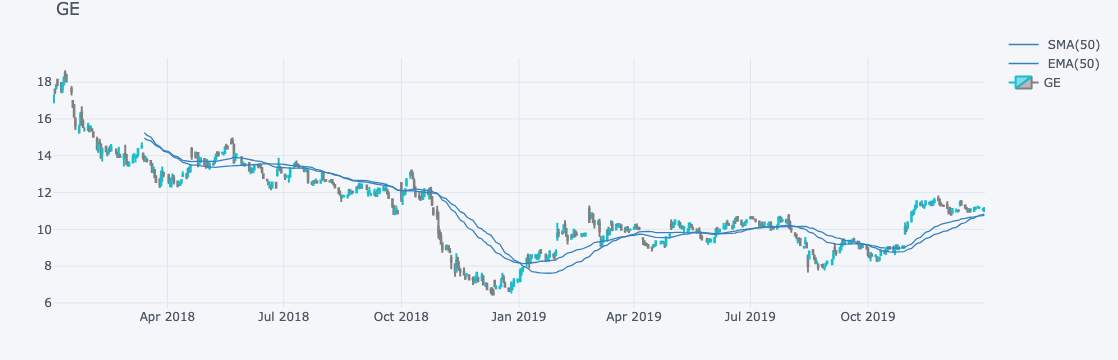

In [198]:
qf.iplot(title = "GE", name = "GE")

__MACD__

In [200]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [202]:
qf = cf.QuantFig(df = ge.loc["2019":])

In [204]:
qf.add_macd(fast_period = 12, slow_period = 26, signal_period = 9)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/ta.py:480: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/ta.py:482: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/

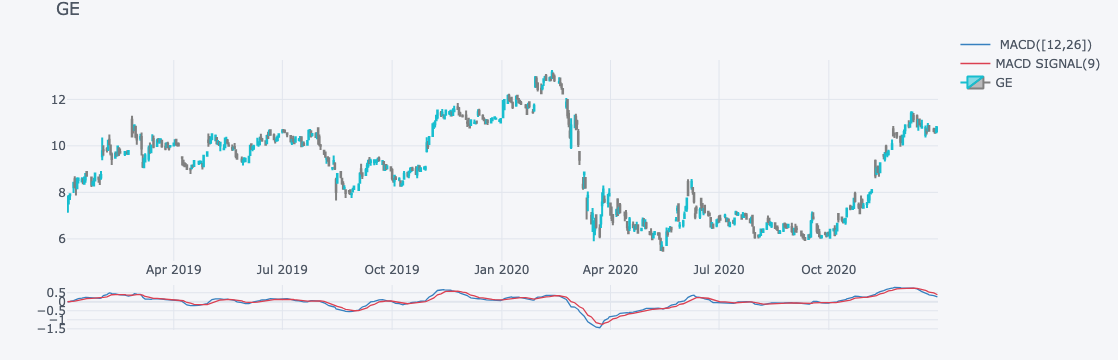

In [206]:
qf.iplot(title = "GE", name = "GE")

__RSI__

In [208]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [210]:
qf = cf.QuantFig(df = ge.loc["2019":])

In [212]:
qf.add_rsi(periods = 20, rsi_upper = 70, rsi_lower = 30)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



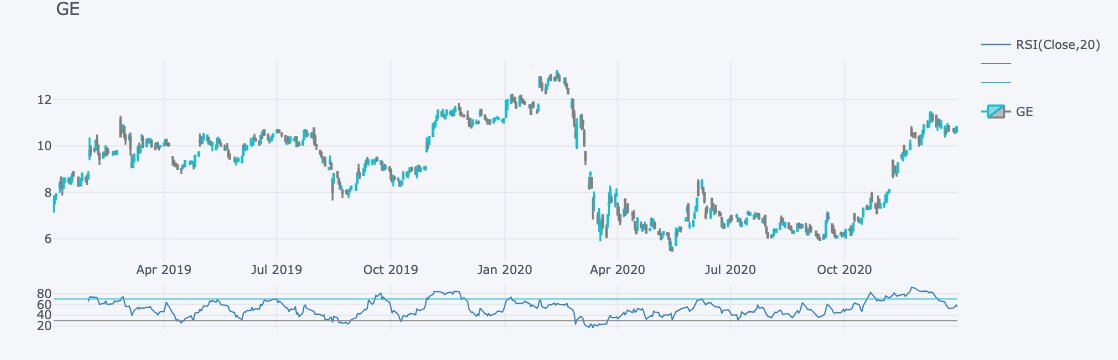

In [214]:
qf.iplot(title = "GE", name = "GE")

__MACD & RSI__

In [218]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [220]:
qf = cf.QuantFig(df = ge.loc["2019":])

In [222]:
qf.add_macd(fast_period = 12, slow_period = 26, signal_period = 9)
qf.add_rsi(periods = 20, rsi_upper = 70, rsi_lower = 30)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/ta.py:480: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/ta.py:482: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/

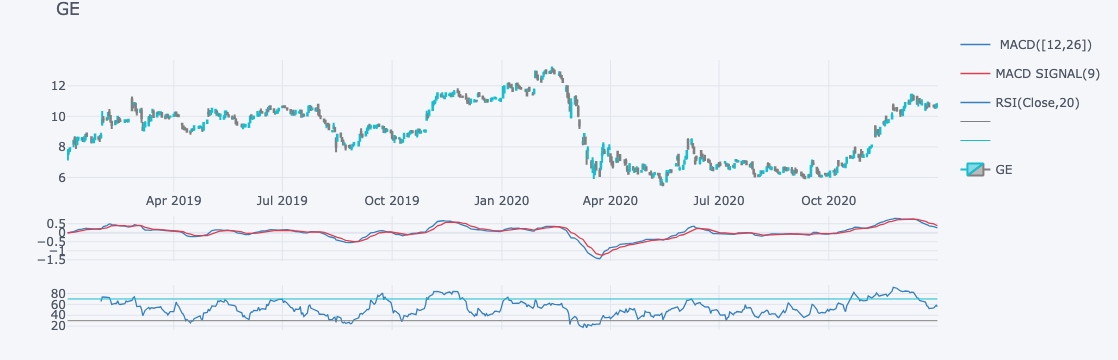

In [224]:
qf.iplot(title = "GE", name = "GE")

__Bollinger Bands__

In [228]:
ge

Attributes  Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  11.001803  14.855769  15.038462  14.567308  14.634615   69763096.0
2010-01-05  11.058768  14.932692  15.067308  14.855769  14.865385   67132624.0
2010-01-06  11.001803  14.855769  15.019231  14.846154  14.932692   57683496.0
2010-01-07  11.571475  15.625000  15.846154  14.836538  14.884615  192891192.0
2010-01-08  11.820707  15.961538  16.048077  15.644231  15.682692  119717104.0
...               ...        ...        ...        ...        ...          ...
2020-12-24  10.650000  10.650000  10.850000  10.620000  10.850000   30049700.0
2020-12-28  10.640000  10.640000  10.780000  10.580000  10.700000   53796700.0
2020-12-29  10.560000  10.560000  10.770000  10.540000  10.660000   53035900.0
2020-12-30  10.710000  10.710000  10.850000  10.550000  10.580000   50621000.0
2020-12-31  10.800000  10.800000  10.830000  10.580000  10.650000   47702300.0

[2769 rows x 6 columns]

In [230]:
qf = cf.QuantFig(df = ge.loc["2019":])

In [232]:
qf.add_bollinger_bands(periods = 20, boll_std = 2)

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/chew-kiatheng/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



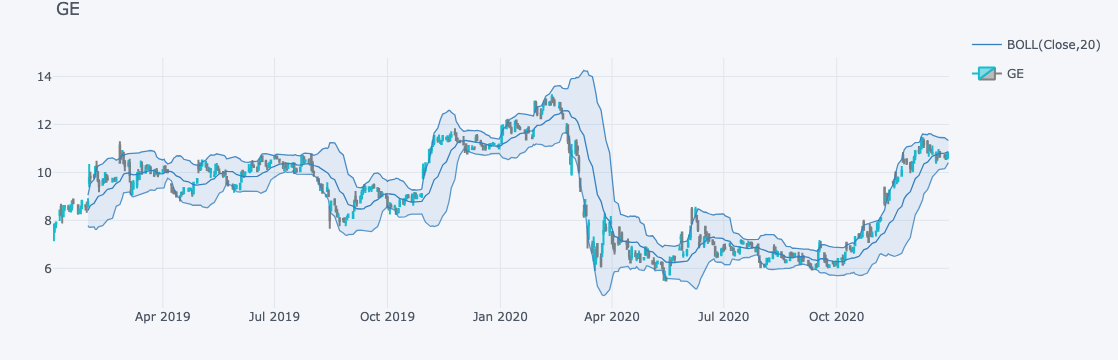

In [234]:
qf.iplot(title = "GE", name = "GE")